# Pytorch Introduction #

See [this link](https://pytorch.org/get-started/locally/) for installation instructions--it's a bit more complicated.

**Note:** You might not have a GPU that works--or the CUDA drivers for your GPU!

In [7]:
import torch  # pip install torch first !!!!!  See https://pytorch.org/get-started/locally/
import numpy as np

## Some ways to Create Tensors ##

See, e.g., [this pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) or [this one](https://pytorch.org/docs/stable/tensors.html). 

In [8]:
mytensor1 = torch.tensor([[1,2],[3,4]])

In [9]:
mytensor1

tensor([[1, 2],
        [3, 4]])

In [10]:
myarray2 = np.array([[6,7],[8,9]])

In [11]:
myarray2

array([[6, 7],
       [8, 9]])

In [12]:
mytensor2 = torch.tensor(myarray2)

In [13]:
mytensor2

tensor([[6, 7],
        [8, 9]])

## Tensor Attributes ##

In [14]:
mytensor2.dtype

torch.int64

In [15]:
mytensor2.shape

torch.Size([2, 2])

In [17]:
mytensor2.grad

**Note:** "This attribute is None by default and becomes a Tensor the first time a call to backward() computes gradients for self."

## Some Tensor operations and methods ##

In [25]:
mytensor3

tensor([[6, 7],
        [8, 9]], device='cuda:0')

In [26]:
mytensor3[1,1]

tensor(9, device='cuda:0')

In [37]:
mytensor4 = torch.normal(mean=0,std=1, size=(10,2,1))

In [38]:
mytensor4

tensor([[[ 1.0031],
         [-0.5343]],

        [[-1.1378],
         [-0.4252]],

        [[ 1.2428],
         [-1.3340]],

        [[ 1.5824],
         [ 0.6447]],

        [[ 1.3444],
         [-0.1495]],

        [[ 0.3136],
         [ 0.7253]],

        [[-1.6716],
         [-0.0602]],

        [[-0.1004],
         [ 2.0126]],

        [[ 2.1712],
         [ 0.0132]],

        [[-0.7432],
         [-1.6442]]])

In [39]:
mytensor4.mean(axis=0)

tensor([[ 0.4005],
        [-0.0752]])

## The Tensor 'device' ##

**Note:** This is probably one of the most important aspects of a pytorch tensor, because it allows us to shift computations onto the GPU by specifying device of each of the involved tensors. 

In [13]:
mytensor2.device

device(type='cpu')

In [14]:
torch.cuda.device_count()

1

In [16]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1660 Ti'

In [21]:
mytensor3 = mytensor2.to(device='cuda')

In [22]:
mytensor3.device

device(type='cuda', index=0)

## Iterables ##

This is a fundamental concept in python that pytorch exploits in creating the 'inner for-loop' based on batches of the training dataset.  The basic examples of iterables are python lists, tuples, sets, and dictionaries.  The **DataLoader** methods create iterables for the inner loop. 

In [18]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


In [19]:
for i in (1,2,3,4,5):
    print(i)

1
2
3
4
5


In [20]:
for i in {1,2,3,4,5}:
    print(i)

1
2
3
4
5


In [22]:
for k, v in { 'one':1,'two':2,'three':3,'four':4, 'five':5}.items():
    print(k)

one
two
three
four
five


## A Simple Example ##

(See the textbook, Chapter 12 pp. 390-395.)

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

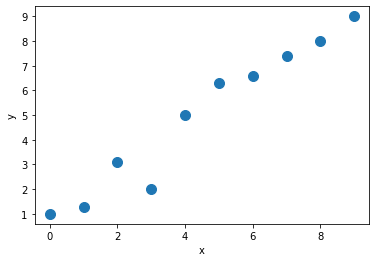

In [24]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

In [25]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [26]:
for item in train_dl:
    print(train_dl)

In [28]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
 
def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')
 

Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


Final Parameters: 2.6696107387542725 4.879678249359131


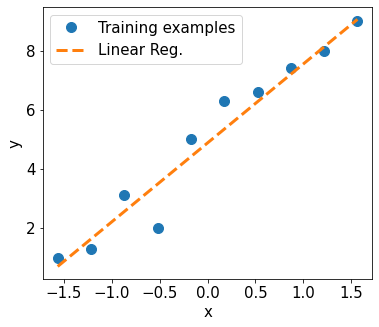

In [29]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

### Model training via the torch.nn and torch.optim modules

In [9]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764


Final Parameters: 2.6496422290802 4.87706995010376


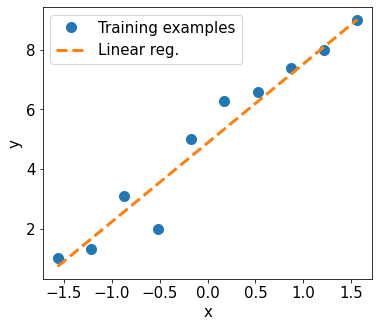

In [10]:
print('Final Parameters:', model.weight.item(), model.bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('ch12-linreg-2.pdf')

plt.show()
